In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import numpy as np
import msgpack
import os
import pandas as pd
from joblib import load
import gerenciar_arqs as GA

# Para plotar figuras mais bonitas
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 10})

# Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# Carrega Arquivos
g_teste, l_teste = GA.carrega_teste()

X_g_teste, X_l_teste, y_teste = GA.ajusta_dados(g_teste, l_teste)

X_g_teste_np = np.array(X_g_teste)
X_l_teste_np = np.array(X_l_teste)
y_teste = np.array(y_teste)

Iniciando leitura dos arquivos de teste.
Arquivos de teste globais lidos.
Arquivos de teste locais lidos.


In [ ]:
X_teste = [np.concatenate([X_g_teste_np[i],X_l_teste_np[i]]) for i in range(len(X_g_teste_np))]

In [ ]:
# Carrega os modelos
sgd_clf = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/sgd_clf.joblib')
sgd_clf_A = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/sgd_clf_A.joblib')

logistic_clf = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/logistic_clf.joblib')
logistic_clf_A = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/logistic_clf_A.joblib')

forest_clf = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/forest_clf.joblib')
forest_clf_A = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/forest_clf_A.joblib')

modelo = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada.h5')
modelo_drop = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_drop.h5')

modelo_a = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_A.h5')
modelo_a_drop = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_A_drop.h5')

modelo_am1 = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_AM1.h5')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use

In [ ]:
forest_clf_AM = load('/content/drive/MyDrive/Bolsa/Dados/Modelos/forest_clf_AM.joblib')
modelo_am2 = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_AM2.h5')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
modelo_am3 = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_AM3.h5')

In [ ]:
modelo_am4 = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_AM4.h5')

In [ ]:
modelo_am5 = keras.models.load_model('/content/drive/MyDrive/Bolsa/Dados/Modelos/rede_bifurcada_AM5.h5')

In [ ]:
# Modelos

#   SGD
y_scores_SGD = sgd_clf.decision_function(X_teste)
precisions_SGD, recalls_SGD, _ = precision_recall_curve(y_teste, y_scores_SGD)
fpr_SGD, tpr_SGD, _ = roc_curve(y_teste, y_scores_SGD)

#   SGD A
y_scores_SGD_A = sgd_clf_A.decision_function(X_teste)
precisions_SGD_A, recalls_SGD_A, _ = precision_recall_curve(y_teste, y_scores_SGD_A)
fpr_SGD_A, tpr_SGD_A, _ = roc_curve(y_teste, y_scores_SGD_A)

#   Regressão Logística
y_scores_logistic = logistic_clf.decision_function(X_teste)
precisions_logistic, recalls_logistic, _ = precision_recall_curve(y_teste, y_scores_logistic)
fpr_logistc, tpr_logistc, _ = roc_curve(y_teste, y_scores_logistic)

#   Regressão Logística A
y_scores_logistic_A = logistic_clf_A.decision_function(X_teste)
precisions_logistic_A, recalls_logistic_A, _ = precision_recall_curve(y_teste, y_scores_logistic_A)
fpr_logistic_A, tpr_logistic_A, _ = roc_curve(y_teste, y_scores_logistic_A)

#   Random Forest
y_probas_forest = forest_clf.predict_proba(X_teste)
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
precisions_forest, recalls_forest, _ = precision_recall_curve(y_teste, y_scores_forest)
fpr_forest, tpr_forest, _ = roc_curve(y_teste, y_scores_forest)
importancia = forest_clf.feature_importances_

#   Random Forest A
y_probas_forest_A = forest_clf_A.predict_proba(X_teste)
y_scores_forest_A = y_probas_forest_A[:, 1] # score = proba of positive class
precisions_forest_A, recalls_forest_A, _ = precision_recall_curve(y_teste, y_scores_forest_A)
fpr_forest_A, tpr_forest_A, _ = roc_curve(y_teste, y_scores_forest_A)
importancia_A = forest_clf_A.feature_importances_

#bins = np.linspace(0,len(importancia)-1, len(importancia))

In [ ]:
#   Random Forest AM
y_probas_forest_AM = forest_clf_AM.predict_proba(X_teste)
y_scores_forest_AM = y_probas_forest_AM[:, 1] # score = proba of positive class
precisions_forest_AM, recalls_forest_AM, _ = precision_recall_curve(y_teste, y_scores_forest_AM)
fpr_forest_AM, tpr_forest_AM, _ = roc_curve(y_teste, y_scores_forest_AM)
importancia_AM = forest_clf_AM.feature_importances_

In [ ]:
modelos = []

modelos.append(modelo)
modelos.append(modelo_drop)
modelos.append(modelo_a)
modelos.append(modelo_a_drop)
modelos.append(modelo_am1)
modelos.append(modelo_am2)
modelos.append(modelo_am3)
modelos.append(modelo_am4)
modelos.append(modelo_am5)

In [ ]:
y_pred = []

In [ ]:
y_pred.append(np.argmax(modelo.predict((X_g_teste_np, X_l_teste_np)), axis=-1))
y_pred.append(np.argmax(modelo_drop.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

y_pred.append(np.argmax(modelo_a.predict((X_g_teste_np, X_l_teste_np)), axis=-1))
y_pred.append(np.argmax(modelo_a_drop.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

y_pred.append(np.argmax(modelo_am1.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

y_pred.append(np.argmax(modelo_am2.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

y_pred.append(np.argmax(modelo_am3.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

y_pred.append(np.argmax(modelo_am4.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

y_pred.append(np.argmax(modelo_am5.predict((X_g_teste_np, X_l_teste_np)), axis=-1))

In [ ]:
for i in y_pred:
    print(confusion_matrix(y_teste, i))

[[1102   79]
 [  58  313]]
[[1034  147]
 [  24  347]]
[[1041  140]
 [  16  355]]
[[1105   76]
 [  62  309]]
[[1049  132]
 [  22  349]]
[[1015  166]
 [  11  360]]
[[1104   77]
 [  58  313]]
[[994 187]
 [  6 365]]
[[1087   94]
 [  56  315]]


In [ ]:
y_pred = logistic_clf_A.predict(X_teste)
y_pred.shape

(1552,)

In [ ]:
#y_pred = forest_clf_A.predict(X_teste)
#y_pred = np.argmax(modelo_am1.predict((X_g_teste_np, X_l_teste_np)), axis=-1)

acertos = 0
erros = 0

for i in range(len(y_teste)):
    if y_pred[i] == 1 and y_teste[i] == True:
        acertos += 1
        #print('Acertou')
    elif y_pred[i] == 0 and y_teste[i] == False:
        acertos += 1
        #print('Acertou')
    else:
        erros += 1
        #print('Errou')

print('Resultado: {}/{} = {}'.format(acertos, len(y_teste), acertos/len(y_teste)))

Resultado: 1386/1552 = 0.8930412371134021


In [ ]:
modelo_am1.evaluate((X_g_teste_np, X_l_teste_np), y_teste)

49/49 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.9008


[0.22464247047901154, 0.9007731676101685]

In [ ]:
y_teste_num = [1 if item == True else 0 for item in y_teste]

In [ ]:
total, selec = 0, 0

for t, s in zip(y_teste_num, y_pred):
    if t == 1:
        total += 1
    if s == 1:
        selec += 1
    
print('total, selec:', total, selec)

fp = 0
tp = 0

for i in range(len(y_pred)):
    if y_teste_num[i] + y_pred[i] == 1:
        fp += 1
    if y_teste_num[i] + y_pred[i] == 2:
        tp += 1

print('fp, tp:', fp, tp)

precision = tp/(tp+fp)
recall = tp/(total)

print('precision, recall:', precision, recall)

total, selec: 371 415
fp, tp: 166 310
precision, recall: 0.6512605042016807 0.8355795148247979


In [ ]:
for i in y_pred:
    pre = keras.metrics.Precision()
    pre.update_state(y_teste, i)
    print(pre.result().numpy())

0.79846936
0.7024292
0.7171717
0.8025974
0.72557175
0.68441063
0.8025641
0.6612319
0.77017117


In [ ]:
for i in y_pred:
    rec = keras.metrics.Recall()
    rec.update_state(y_teste, i)
    print(rec.result().numpy())

0.8436658
0.93530995
0.9568733
0.8328841
0.9407008
0.9703504
0.8436658
0.9838275
0.8490566


In [ ]:
for i in y_pred:
    auc = keras.metrics.AUC(curve='PR')
    auc.update_state(y_teste, i)
    print(auc.result().numpy())

0.73586893
0.68196034
0.7030978
0.7349517
0.70575935
0.6755161
0.7394432
0.65668195
0.7132604


In [ ]:
y_probas = []

for mod in modelos:
    y_probas.append(mod.predict((X_g_teste_np, X_l_teste_np)))

In [ ]:
y_scores = []

for prob in y_probas:
    y_scores.append(prob[:, 1])

In [ ]:
y_scores[1]

array([2.1380954e-03, 3.7156721e-03, 4.6079911e-02, ..., 3.6761615e-02,
       3.0659882e-02, 1.2150900e-05], dtype=float32)

In [ ]:
precisions = []
recalls = []
fprs = []
tprs = []

for scr in y_scores:
    pre, rec, _ = precision_recall_curve(y_teste, scr)
    fpr, tpr, _ = roc_curve(y_teste, scr)

    precisions.append(pre)
    recalls.append(rec)

    fprs.append(fprs)
    tprs.append(tpr)

AUC: tf.Tensor(0.83992803, shape=(), dtype=float32)
AUC: tf.Tensor(0.8814847, shape=(), dtype=float32)
AUC: tf.Tensor(0.9003309, shape=(), dtype=float32)
AUC: tf.Tensor(0.91568965, shape=(), dtype=float32)
AUC: tf.Tensor(0.9258051, shape=(), dtype=float32)
AUC: tf.Tensor(0.9336832, shape=(), dtype=float32)
AUC: tf.Tensor(0.9389949, shape=(), dtype=float32)
AUC: tf.Tensor(0.9440684, shape=(), dtype=float32)
AUC: tf.Tensor(0.9476284, shape=(), dtype=float32)


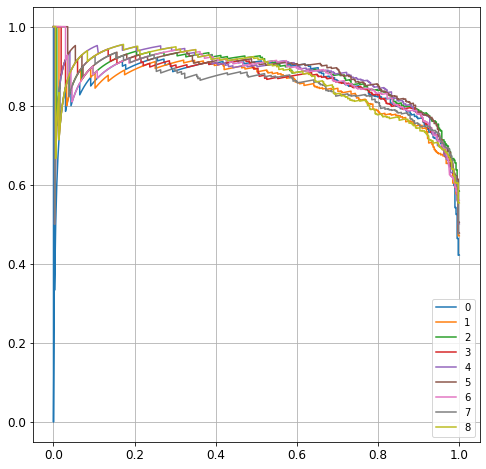

In [ ]:
for i in range(len(precisions)):
    #if i == 1 or i == 3:
    #    continue
    print('AUC:', auc(recalls[i], precisions[i]))
    plt.plot(recalls[i], precisions[i], label=str(i))

plt.legend()
#plt.ylim(bottom=0.4, top=1)
#plt.xlim(left=0.1, right=1)
plt.grid(b=True)
plt.show()

In [ ]:
salva_figs = '/content/drive/MyDrive/Bolsa/Dados/Figuras'

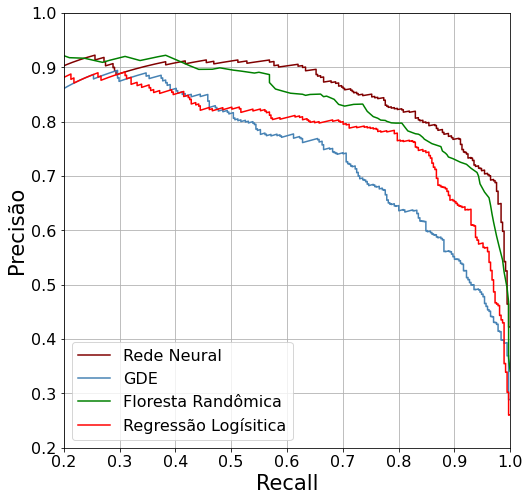

In [ ]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon', 'peru', 'black', 'm', 'blue', 'orange']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop',
        'Rede Neural AM1', 'Rede Neural AM2', 'Rede Neural AM3', 'Rede Neural AM4',
        'Rede Neural AM5']

for i in range(len(precisions)):
    if i == 0 or i == 1 or i == 3 or i == 7 or i == 8:
        continue
    #print('AUC:', auc(recalls[i], precisions[i]))
    #plt.plot(recalls[i], precisions[i], color=cores[i], label = leg[i])

i = 0
plt.plot(recalls[i], precisions[i], color=cores[i], label = leg[i])
plt.plot(recalls_SGD, precisions_SGD, color='steelblue', label = 'GDE')
#plt.plot(recalls_SGD_A, precisions_SGD_A, color='blue', label = 'GDE A')
plt.plot(recalls_forest, precisions_forest, color='g', label = 'Floresta Randômica')
#plt.plot(recalls_forest_A, precisions_forest_A, color='aquamarine', label = 'Floresta Randômica A')
plt.plot(recalls_logistic, precisions_logistic, color='red', label = 'Regressão Logísitica')
#plt.plot(recalls_logistic_A, precisions_logistic_A, color='m', label = 'Regressão Logísitica A')
#plt.plot(recalls_forest_AM, precisions_forest_AM, color='pink', label = 'Forest AM')


plt.xlim(left=0.2, right=1)
plt.xlabel('Recall', fontsize = tam+5)
plt.xticks(fontsize = tam)

plt.ylim(bottom=0.2, top=1)
plt.ylabel('Precisão', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
print('AUC M1:', auc(recalls[4], precisions[4]))
print('AUC M2:', auc(recalls[5], precisions[5]))
print('AUC M3:', auc(recalls[6], precisions[6]))
print('AUC SGD:', auc(recalls_SGD, precisions_SGD))
print('AUC SGDA:', auc(recalls_SGD_A, precisions_SGD_A))
print('AUC LR:', auc(recalls_logistic, precisions_logistic))
print('AUC LRA:', auc(recalls_logistic_A, precisions_logistic_A))
print('AUC FR:', auc(recalls_forest_A, precisions_forest_A))
print('AUC FRM:', auc(recalls_forest_AM, precisions_forest_AM))



AUC M1: 0.8798728927539339
AUC M2: 0.8831568645258618
AUC M3: 0.8722103647036101
AUC SGD: 0.7614426607680451
AUC SGDA: 0.784362069753621
AUC LR: 0.7947508403870401
AUC LRA: 0.7938022201431923
AUC FR: 0.8728600335898854
AUC FRM: 0.8886748570694447


In [ ]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon', 'peru', 'black', 'm', 'blue', 'orange']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop',
        'Rede Neural AM1', 'Rede Neural AM2', 'Rede Neural AM3', 'Rede Neural AM4',
        'Rede Neural AM5']

for i in range(len(precisions)):
    if i == 0 or i == 1 or i == 3 or i == 7 or i == 8:
        continue
    #print('AUC:', auc(recalls[i], precisions[i]))
    #plt.plot(recalls[i], precisions[i], color=cores[i], label = leg[i])

i = 0
plt.plot(fprs[i], tprs[i], color=cores[i], label = leg[i])
plt.plot(fpr_SGD, tpr_SGD, color='steelblue', label = 'GDE')
#plt.plot(recalls_SGD_A, precisions_SGD_A, color='blue', label = 'GDE A')
plt.plot(fpr_forest, tpr_forest, color='g', label = 'Floresta Randômica')
#plt.plot(recalls_forest_A, precisions_forest_A, color='aquamarine', label = 'Floresta Randômica A')
plt.plot(fpr_logistc, tpr_logistc, color='red', label = 'Regressão Logísitica')
#plt.plot(recalls_logistic_A, precisions_logistic_A, color='m', label = 'Regressão Logísitica A')
#plt.plot(recalls_forest_AM, precisions_forest_AM, color='pink', label = 'Forest AM')


#plt.xlim(left=0.2, right=1)
plt.xlabel('TFP', fontsize = tam+5)
plt.xticks(fontsize = tam)

#plt.ylim(bottom=0.2, top=1)
plt.ylabel('TPV', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
fprs[4], tprs[4], _ = roc_curve(y_teste, y_scores[4])
fprs[5], tprs[5], _ = roc_curve(y_teste, y_scores[5])
fprs[6], tprs[6], _ = roc_curve(y_teste, y_scores[6])

In [ ]:
modelo_am1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 visao_global (InputLayer)      [(None, 2001)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 200)          400400      ['visao_global[0][0]']           
                                                                                                  
 visao_local (InputLayer)       [(None, 201)]        0           []                               
                                                                                                  
 dense_1 (Dense)                (None, 100)          20100       ['dense[0][0]']                  
                                                                                              

In [ ]:
print('AUC M1:', auc(fprs[4], tprs[4]))
print('AUC M2:', auc(fprs[5], tprs[5]))
print('AUC M3:', auc(fprs[6], tprs[6]))
print('AUC SGD:', auc(fpr_SGD, tpr_SGD))
print('AUC SGDA:', auc(fpr_SGD_A, tpr_SGD_A))
print('AUC LR:', auc(fpr_logistc, tpr_logistc))
print('AUC LRA:', auc(fpr_logistic_A, tpr_logistic_A))
print('AUC FR:', auc(fpr_forest_A, tpr_forest_A))
print('AUC FRM:', auc(fpr_forest_AM, tpr_forest_AM))

AUC M1: 0.9692879851923195
AUC M2: 0.9705056019500127
AUC M3: 0.9678033372056666
AUC SGD: 0.9187243667137585
AUC SGDA: 0.9297753514199443
AUC LR: 0.9392926182982579
AUC LRA: 0.9396304013913012
AUC FR: 0.9635068732012481
AUC FRM: 0.9691133878503073


In [ ]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon', 'peru', 'black', 'm', 'blue', 'orange']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop',
        'Rede Neural AM1', 'Rede Neural AM2', 'Rede Neural AM3', 'Rede Neural AM4',
        'Rede Neural AM5']


plt.plot(fprs[0], tprs[0], color=cores[0], label = leg[0])
plt.plot(fprs[4], tprs[4], color=cores[4], label = leg[4])
plt.plot(fprs[5], tprs[5], color=cores[5], label = leg[5])
plt.plot(fprs[6], tprs[6], color=cores[6], label = leg[6])
#plt.plot(recalls_SGD, precisions_SGD, color='steelblue', label = 'GDE')
#plt.plot(recalls_SGD_A, precisions_SGD_A, color='blue', label = 'GDE A')
plt.plot(fpr_forest, tpr_forest, color='g', label = 'Floresta Randômica')
plt.plot(fpr_forest_A, tpr_forest_A, color='aquamarine', label = 'Floresta Randômica A')
#plt.plot(recalls_logistic, precisions_logistic, color='red', label = 'Regressão Logísitica')
#plt.plot(recalls_logistic_A, precisions_logistic_A, color='m', label = 'Regressão Logísitica A')
plt.plot(fpr_forest_AM, tpr_forest_AM, color='pink', label = 'Forest AM')


#plt.xlim(left=0.2, right=1)
plt.xlabel('fpr', fontsize = tam+5)
plt.xticks(fontsize = tam)

#plt.ylim(bottom=0.2, top=1)
plt.ylabel('tpr', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico.pdf', bbox_inches = 'tight')
plt.show()

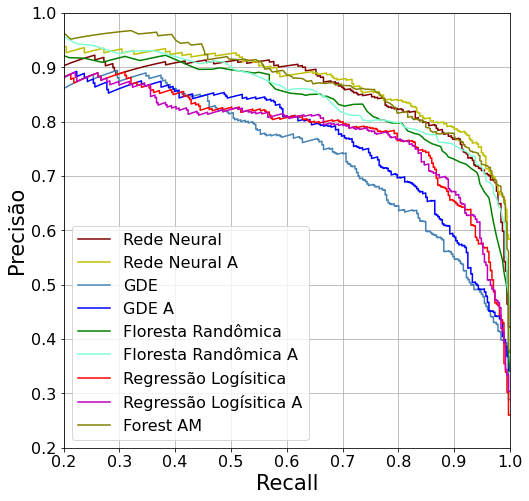

In [ ]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop']

for i in range(len(precisions)):
    if i == 1 or i == 3:
        continue
    #print('AUC:', auc(recalls[i], precisions[i]))
    plt.plot(recalls[i], precisions[i], color=cores[i], label = leg[i])
plt.plot(recalls_SGD, precisions_SGD, color='steelblue', label = 'GDE')
plt.plot(recalls_SGD_A, precisions_SGD_A, color='blue', label = 'GDE A')
plt.plot(recalls_forest, precisions_forest, color='g', label = 'Floresta Randômica')
plt.plot(recalls_forest_A, precisions_forest_A, color='aquamarine', label = 'Floresta Randômica A')
plt.plot(recalls_logistic, precisions_logistic, color='red', label = 'Regressão Logísitica')
plt.plot(recalls_logistic_A, precisions_logistic_A, color='m', label = 'Regressão Logísitica A')
plt.plot(recalls_forest_AM, precisions_forest_AM, color='olive', label = 'Forest AM')


plt.xlim(left=0.2, right=1)
plt.xlabel('Recall', fontsize = tam+5)
plt.xticks(fontsize = tam)

plt.ylim(bottom=0.2, top=1)
plt.ylabel('Precisão', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico_A.pdf', bbox_inches = 'tight')
plt.show()

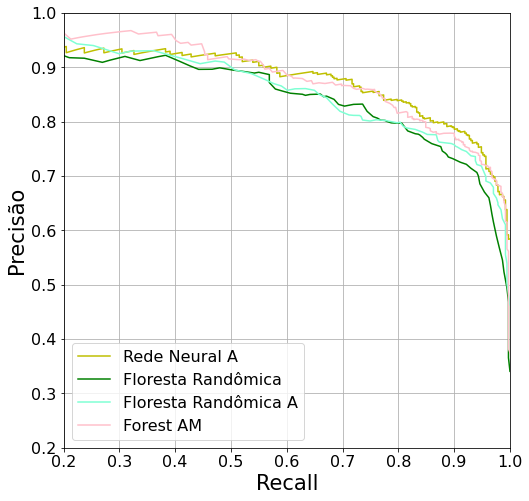

In [ ]:
# Plotagem Precisão x Recall

tam = 16

plt.rcParams["figure.figsize"] = (8,8)

cores = ['maroon', 'rebeccapurple', 'y', 'lightsalmon']
leg = ['Rede Neural', 'Rede Neural com Drop', 'Rede Neural A', 'Rede Neural A com Drop']


plt.plot(recalls[2], precisions[2], color=cores[2], label = leg[2])
plt.plot(recalls_forest, precisions_forest, color='g', label = 'Floresta Randômica')
plt.plot(recalls_forest_A, precisions_forest_A, color='aquamarine', label = 'Floresta Randômica A')
plt.plot(recalls_forest_AM, precisions_forest_AM, color='pink', label = 'Forest AM')


plt.xlim(left=0.2, right=1)
plt.xlabel('Recall', fontsize = tam+5)
plt.xticks(fontsize = tam)

plt.ylim(bottom=0.2, top=1)
plt.ylabel('Precisão', fontsize = tam+5)
plt.yticks(fontsize = tam)

plt.grid(b=True)
plt.legend(fontsize = tam, markerscale = 2, loc='lower left')

#plt.savefig(salva_figs+'/PxR_basico_A.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
print('RNA:', auc(recalls[2], precisions[2]))

RNA: tf.Tensor(0.8422104, shape=(), dtype=float32)


In [ ]:
print('FRAM:', auc(recalls_forest_AM, precisions_forest_AM))

FRAM: tf.Tensor(0.8608287, shape=(), dtype=float32)
